# House Rocket Company Project

## 1. Load Packages

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import plotly.express as px
pd.options.display.float_format = '{:,.2f}'.format
# from pypi import heatmap, corrplot

## 2. Data Set Import & Wrangling

In [2]:
path = os.getcwd()
data = pd.read_csv(path + '/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [3]:
data.shape

(21613, 21)

In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00"
mean,"4,580,301,520.86","540,088.14",3.37,2.11,"2,079.90","15,106.97",1.49,0.01,0.23,3.41,7.66,"1,788.39",291.51,"1,971.01",84.40,"98,077.94",47.56,-122.21,"1,986.55","12,768.46"
std,"2,876,565,571.31","367,127.20",0.93,0.77,918.44,"41,420.51",0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,"27,304.18"
min,"1,000,102.00","75,000.00",0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00
25%,"2,123,049,194.00","321,950.00",3.00,1.75,"1,427.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00",0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00"
50%,"3,904,930,410.00","450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00"
75%,"7,308,900,445.00","645,000.00",4.00,2.50,"2,550.00","10,688.00",2.00,0.00,0.00,4.00,8.00,"2,210.00",560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00"
max,"9,900,000,190.00","7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00"


In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Here we have column 'date' as an object type, let's change it to datetime.

In [7]:
data['date'] = pd.to_datetime(data['date'])

In [8]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### 2.1 Cleaning Data
First, we check if there are any missing values.

In [9]:
data.isnull().sum()
miss_val = data.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=data.isnull().sum().sort_values(ascending=False), columns=['MissValCount'])
miss_val

,MissValCount
id,0
grade,0
sqft_living15,0
long,0
lat,0
zipcode,0
yr_renovated,0
yr_built,0
sqft_basement,0
sqft_above,0


There are no missing values, let's check for the duplicates.

In [10]:
duplicated = pd.DataFrame(data=data.duplicated(subset=['id']).value_counts(), columns=['Duplicated'])
duplicated

,Duplicated
False,21436
True,177


In [11]:
# getting rid of them

data = data.drop_duplicates(subset = ['id'], keep = 'last')
data.sort_values('id').head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,2015-04-22,"300,000.00",6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
6735,1200019,2014-05-08,"647,500.00",4,1.75,2060,26036,1.00,0,0,...,8,1160,900,1947,0,98166,47.44,-122.35,2590,21891
8411,1200021,2014-08-11,"400,000.00",3,1.00,1460,43000,1.00,0,0,...,7,1460,0,1952,0,98166,47.44,-122.35,2250,20023
8809,2800031,2015-04-01,"235,000.00",3,1.00,1430,7599,1.50,0,0,...,6,1010,420,1930,0,98168,47.48,-122.27,1290,10320
3557,3600057,2015-03-19,"402,500.00",4,2.00,1650,3504,1.00,0,0,...,7,760,890,1951,2013,98144,47.58,-122.29,1480,3504


In [12]:
data.shape

(21436, 21)

Now, let's check for any outliers that might affect our incoming analysis.

In [13]:
unique = data[['bedrooms','bathrooms','floors','waterfront','view','condition','grade']]

for i in unique:
    print('Feature: {} - {}'.format(i, data[i].unique().tolist()))

Feature: bedrooms - [3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]
Feature: bathrooms - [1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.75, 3.25, 4.0, 3.5, 0.75, 4.75, 5.0, 4.25, 3.75, 0.0, 1.25, 5.25, 6.0, 0.5, 5.5, 6.75, 5.75, 8.0, 7.5, 7.75, 6.25, 6.5]
Feature: floors - [1.0, 2.0, 1.5, 3.0, 2.5, 3.5]
Feature: waterfront - [0, 1]
Feature: view - [0, 3, 4, 2, 1]
Feature: condition - [3, 5, 4, 1, 2]
Feature: grade - [7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13, 1]


In 'bedrooms' column, we can observe that '33' is clearly out of range, so we can exclude this line.

In [14]:
data.loc[data['bedrooms'] == 33]
data.drop(data.loc[data['bedrooms'] == 33].index, inplace=True)

# 3. Explaratory Data Analysis

## 3.1 Checking correlation

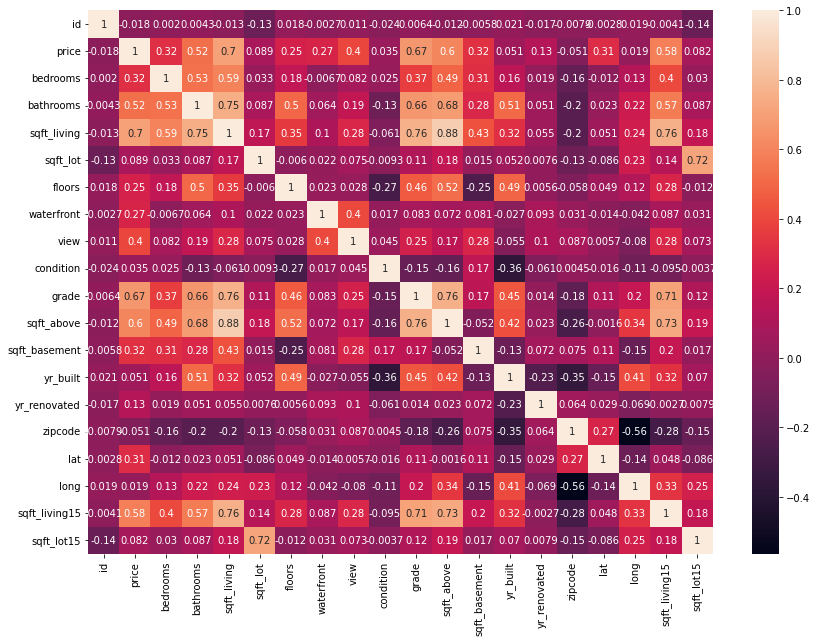

In [15]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

## 3.2 Hypotheses

Let's make some assumptions based on what we have seen until now, and evaluate them as true or false:

- H1: Properties with waterfront are 30% more expensive, on average.

- H2: Properties built in 1955 or older are 50% cheaper, on average.

- H3: Properties without a basement are 40% larger than properties with a basement.

- H4: YoY (Year over Year) property price growth is 10%.

- H5: The greater the number of bathrooms, the higher the price

## 3.3 Creating new columns

In [16]:
# making a copy of the dataset
df = data.copy()

# column for H2. 

df['yr_old'] = df['yr_built'].apply(lambda x: '> 1955' if x > 1955 else '< 1955')

# column for h3
      
df['basement'] = df['sqft_basement'].apply(lambda x: 'no' if x == 0 else 'yes')      

# coluna for h4

df['year'] = pd.to_datetime(df['date']).dt.year

# coluna for h5

df['describe_bathrooms'] = df['bathrooms'].apply(lambda x: '> 3' if x >= 3.0
                                                                else '< 3')


# creating seasons

df['month'] = pd.to_datetime(df['date']).dt.month
df['season'] = df['month'].apply(lambda x: 'summer' if (x > 5) & (x < 8) else
                                           'spring' if (x > 2) & (x < 5) else
                                           'fall' if (x > 8) & (x < 12) else
                                           'winter')

df['condition_name'] = df['condition'].apply(lambda x:   'worn-out' if x == 1 else
                                                         'fair' if x == 2 else
                                                         'average'if x == 3 else
                                                         'good' if x == 4 else
                                                         'excellent')

df['grade_name'] = df['grade'].apply(lambda x: 'low-quality' if (x <= 3) else
                                           'simple' if (x > 3) & (x <= 6) else
                                           'fair' if (x > 6) & (x < 10) else
                                           'high-quality')                                                        

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,yr_old,basement,year,describe_bathrooms,month,season,condition_name,grade_name
0,7129300520,2014-10-13,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,1340,5650,< 1955,no,2014,< 3,10,fall,average,fair
1,6414100192,2014-12-09,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,1690,7639,< 1955,yes,2014,< 3,12,winter,average,fair
2,5631500400,2015-02-25,"180,000.00",2,1.00,770,10000,1.00,0,0,...,2720,8062,< 1955,no,2015,< 3,2,winter,average,simple
3,2487200875,2014-12-09,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,1360,5000,> 1955,yes,2014,> 3,12,winter,excellent,fair
4,1954400510,2015-02-18,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,1800,7503,> 1955,no,2015,< 3,2,winter,average,fair


# 4. Hypothesis Analysis

- **H1: Properties with waterfront are 30% more expensive, on average.**

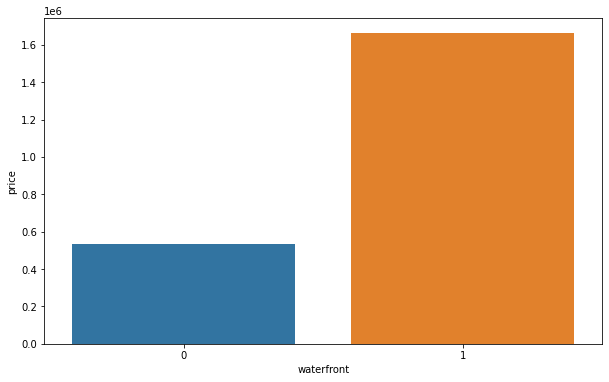

In [18]:
# group the prices of properties with/without water view, then plot in bars to analyze the result.

h1 = df[['price','waterfront']].groupby('waterfront').mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x = h1['waterfront'],y = h1['price'])
plt.show()

In [19]:
h1_percent = (h1.loc[1,'price'] - h1.loc[0,'price']) / h1.loc[0,'price']
print('H1: True. Properties with waterfront are {0:.0%} more expensive'.format(h1_percent))

H1: True. Properties with waterfront are 212% more expensive


- **H2: Properties built in 1955 or older are 50% cheaper, on average.**

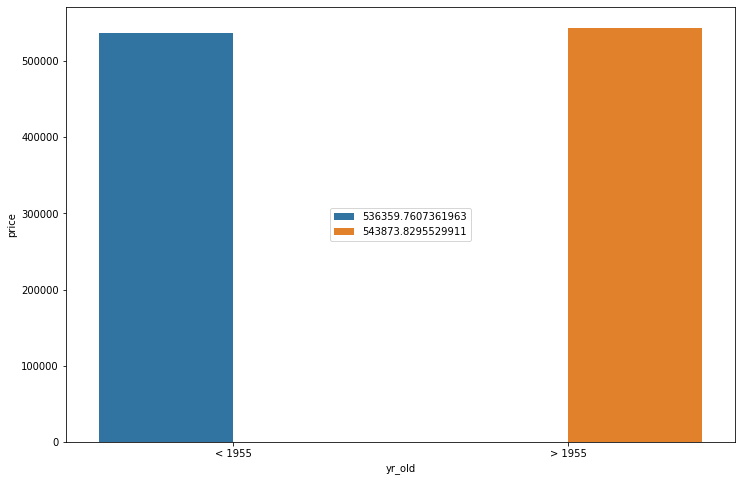

In [20]:
# separate between < and > 1955

h2 = df[['price','yr_old']].groupby('yr_old').mean().reset_index()

x = h2['yr_old']
y = h2['price']

plt.figure(figsize=(12,8))
sns.barplot(x = x,y = y, hue=h2['price'])
plt.legend(loc='center')
plt.show()


In [21]:
h2_percent = (h2.loc[1,'price'] - h2.loc[0,'price']) / h2.loc[1,'price']
print('H2: False. Homes built before 1955 are on average just {0:.0%} cheaper.'.format(h2_percent))

H2: False. Homes built before 1955 are on average just 1% cheaper.


- **H3: Properties without a basement are 40% larger than properties with a basement.**

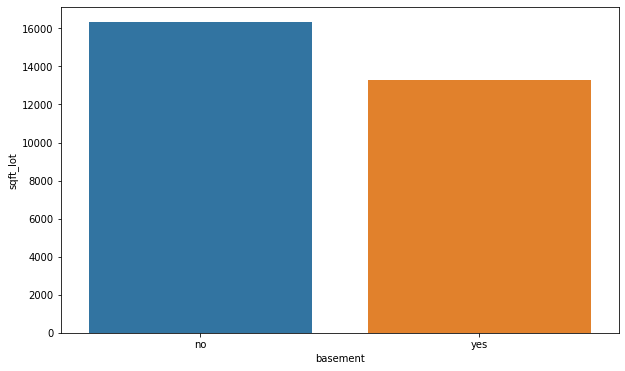

In [22]:
# create a column to convert the numeric values of the sqft_basement column to numeric

# group between the two statements and create a variable where the difference in percentage is calculated.

h3 = df[['sqft_lot','basement']].groupby('basement').mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x = h3['basement'],y = h3['sqft_lot'])
plt.show()

In [23]:
h3_percent = (h3.loc[0,'sqft_lot'] - h3.loc[1,'sqft_lot']) / h3.loc[1,'sqft_lot']
print('H3: True. Properties without a basement have a {0:.0%} larger plot area. Although its lower than 40%, we will still consider it to be true because the difference is significant and can be used as a metric when defining the price for posterior sale.'.format(h3_percent))

H3: True. Properties without a basement have a 23% larger plot area. Although its lower than 40%, we will still consider it to be true because the difference is significant and can be used as a metric when defining the price for posterior sale.


- **H4: YoY (Year over Year) property price growth is 10%.**

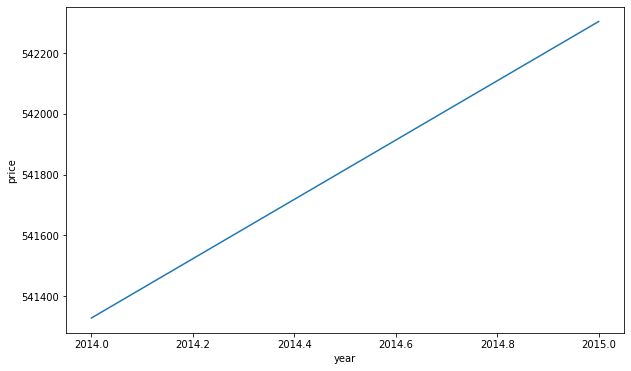

In [24]:
# create a column filtering the sale date only with its year. 
# then make a groupby and then a function with the percentage of the difference

h4 = df[['price','year']].groupby('year').mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x = h4['year'],y = h4['price'])
plt.show()

In [25]:
h4_percent = (h4.loc[1,'price'] - h4.loc[0,'price']) / h4.loc[0,'price']
print('H4: False. The price growth over the years was {0:.2%}.'.format(h4_percent))

H4: False. The price growth over the years was 0.18%.


- **H5: The greater the number of bathrooms, the higher the price**

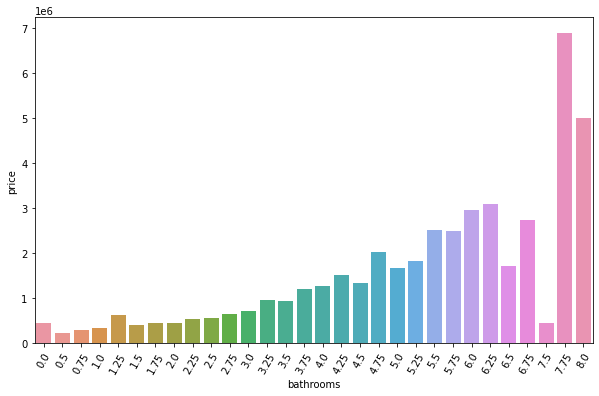

In [26]:
h5 = df[['price', 'bathrooms']].groupby('bathrooms').mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x= h5['bathrooms'], y = h5['price'])
plt.xticks( rotation=60 )
plt.show()

In [27]:
print('H5: True. According to the graph, the price increases as the number of bathrooms increases. We can see that certain properties with 6 and 7 bathrooms are cheap. We may review the condition of that property and increase the resale price accordingly.')

H5: True. According to the graph, the price increases as the number of bathrooms increases. We can see that certain properties with 6 and 7 bathrooms are cheap. We may review the condition of that property and increase the resale price accordingly.


# 5. Business Questions

## 5.1 Which properties should House Rocket buy?

In [28]:
# group properties by zipcode
df1 = data[['zipcode','price']].groupby('zipcode').median().reset_index()

# rename the price column created in df1 to price_median
df1 = df1.rename(columns={'price': 'price_median'})

# add this column to the original dataset
df = pd.merge(df1,df,on='zipcode',how='inner')

# create a column with the guidance whether or not to buy the properties, following the two conditions:

# 1. If the property price is lower than the average price in that region
# 2. If the condition of the property is at least average

for i in range(len(df)):
    
    #1
    if (df.loc[i,'price'] < df.loc[i,'price_median']) & (df.loc[i,'condition'] >= 3):
        df.loc[i,'status'] = 'worth'
    #2
    else:
        df.loc[i,'status'] = 'not worth'

In [29]:
# create a report with only the columns of interest, sorting from the lowest price to the highest, considering the best real estate conditions

houses_to_buy = df[df['status'] == 'worth'].sort_values(by=['condition_name','price'])

print('There are {} properties are worth it for purchasing.'.format(len(houses_to_buy)))

There are 10505 properties are worth it for purchasing.


## 5.2. When is the best time to sell a house? At what price?

In [30]:
# Para análisar essa questão, iremos levar em consideração a sazonalidade. Criei uma variável que define todas as estações do ano.

# achar o preço mediano de cada zipcode em diferentes sazonalidades
df2 = df[['zipcode','season','price']].groupby(['zipcode','season']).median().reset_index()

#renomear coluna para combinar com o dataset original
df2 = df2.rename(columns = {'price': 'price_median_season'})

#juntar ao dataset original e filtrar apenas as casas aptas para compra
df3= pd.merge(houses_to_buy,df2, how='inner', on=['zipcode','season'])

In [31]:
# If the purchase price is greater than the region median + seasonality. The sale price will be equal to the purchase price +10%

# If the purchase price is less than the region median + seasonality. The sale price will be equal to the purchase price +30%

for i in range(len(df3)):
    
            if df3.loc[i, 'price'] <= df3.loc[i, 'price_median_season']:
                 df3.loc[i, 'sale_price'] = df3.loc[i, 'price'] * 1.30
            elif df3.loc[i, 'price'] > df3.loc[i, 'price_median_season']:
                 df3.loc[i, 'sale_price'] = df3.loc[i, 'price'] * 1.10
            else:
                 pass
                
df3['profit'] = df3['sale_price'] - df3['price']

In [32]:
# top 5 profit properties 

df3[['id','zipcode','price','price_median','season','price_median_season','condition_name', 'grade_name','sale_price', 'profit']]
pd.DataFrame(df3.groupby(['zipcode'])['profit'].sum().sort_values(ascending=False).reset_index()).head() # top 5 zipcode more profitable
# df3.sort_values('profit', ascending=False).head() #top 5 properties


,zipcode,profit
0,98052,"41,495,434.30"
1,98006,"40,176,225.00"
2,98004,"38,613,096.50"
3,98115,"37,619,667.40"
4,98103,"36,547,490.30"


In [33]:
# sum of profit company will have, following the suggestion

amount = df3['profit'].sum()
print('Total profit of the company will be: ${:,.2f}'.format(amount))

Total profit of the company will be: $1,186,638,788.20


In [64]:
df3.groupby(['zipcode'])['profit'].sum().sort_values(ascending=False).reset_index()
# df2 = df[['zipcode','season','price']].groupby(['zipcode','season']).median().reset_index()

,zipcode,profit
0,98052,"41,495,434.30"
1,98006,"40,176,225.00"
2,98004,"38,613,096.50"
3,98115,"37,619,667.40"
4,98103,"36,547,490.30"
...,...,...
65,98188,"4,368,357.90"
66,98032,"3,709,854.50"
67,98010,"3,703,788.20"
68,98024,"3,701,821.00"


In [67]:
df3.loc[(df3['zipcode'] == 98052) & (df3['condition_name'] == 'excellent')]


,zipcode,price_median,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,year,describe_bathrooms,month,season,condition_name,grade_name,status,price_median_season,sale_price,profit
6839,98052,"615,000.00",8045000340,2014-08-02,"565,000.00",3,2.50,1700,7210,2.00,...,2014,< 3,8,winter,excellent,fair,worth,"615,000.00","734,500.00","169,500.00"
8309,98052,"615,000.00",339600190,2014-10-14,"420,000.00",3,1.00,1310,3963,1.00,...,2014,< 3,10,fall,excellent,fair,worth,"589,950.00","546,000.00","126,000.00"
8310,98052,"615,000.00",7955040160,2014-10-16,"495,000.00",3,2.00,1460,9759,1.00,...,2014,< 3,10,fall,excellent,fair,worth,"589,950.00","643,500.00","148,500.00"
8311,98052,"615,000.00",9512501370,2014-11-05,"544,300.00",4,1.75,1560,9000,1.00,...,2014,< 3,11,fall,excellent,fair,worth,"589,950.00","707,590.00","163,290.00"
8803,98052,"615,000.00",1842300050,2014-07-02,"600,000.00",5,2.00,2190,9072,1.00,...,2014,< 3,7,summer,excellent,fair,worth,"615,000.00","780,000.00","180,000.00"


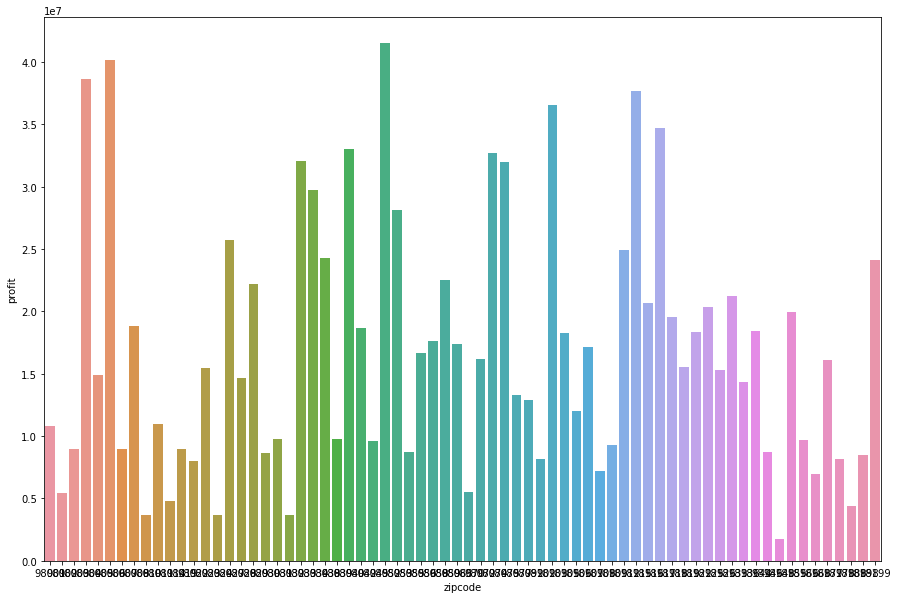

In [69]:
xticks = sorted(df3.zipcode.unique().tolist()) # tentei aplicar esse xticks, graifco fica em branco
ticks = np.arange(98000, 98200, 1)
labels = ticks


plt.figure(figsize=(15,10))
# sns.barplot(x=df3['zipcode'], y=df3['profit'])
sns.barplot(data=df3.groupby(['zipcode'])['profit'].sum().reset_index(), x='zipcode', y='profit')
# plt.xticks(ticks, labels)
# plt.xticks([98000, 98020, 98040, 98060, 98080, 98100, 98120,98140, 98160, 98180, 98200])
plt.show()